# 导包

In [31]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()
import json
import torch
import pickle
from torch import nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from config import get_config_regression
from easydict import EasyDict as edict

In [32]:
from tabulate import tabulate

my_dict = {'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}
args = {'model_name': 'dmd', 'dataset_name': 'mosi', 'featurePath': './dataset/MOSI/Processed/unaligned_50.pkl', 'seq_lens': [50, 375, 500], 'feature_dims': [768, 5, 20], 'train_samples': 1284, 'num_classes': 3, 'language': 'en', 'KeyEval': 'Loss', 'need_data_aligned': False, 'need_model_aligned': False, 'early_stop': 10, 'use_bert': True, 'use_finetune': True, 'attn_mask': True, 'update_epochs': 10, 'sd_num': 512, 'sd_temperature': 2, 'loss_factor': 0.1, 'attn_dropout_a': 0.2, 'attn_dropout_v': 0.0, 'relu_dropout': 0.0, 'embed_dropout': 0.2, 'res_dropout': 0.0, 'dst_feature_dim_nheads': [50, 10], 'batch_size': 16, 'learning_rate': 0.0001, 'nlevels': 4, 'conv1d_kernel_size_l': 5, 'conv1d_kernel_size_a': 5, 'conv1d_kernel_size_v': 5, 'text_dropout': 0.5, 'attn_dropout': 0.3, 'output_dropout': 0.5, 'grad_clip': 0.6, 'patience': 10, 'weight_decay': 0.005, 'transformers': 'bert', 'pretrained': 'bert-base-uncased', 'is_distill': True, 'mode': 'train', 'model_save_path': ('pt/dmd_mosi.pth'), 'device': "device(type='cuda', index=0)", 'train_mode': 'regression', 'feature_T': '', 'feature_A': '', 'feature_V': '', 'cur_seed': 1}


# 将字典转换为列表，以便使用tabulate
table_data = list(args.items())

# 使用tabulate进行格式化输出
formatted_table = tabulate(table_data, headers=['Key', 'Value'], tablefmt='grid')

print(formatted_table)


+------------------------+-------------------------------------------+
| Key                    | Value                                     |
+========================+===========================================+
| model_name             | dmd                                       |
+------------------------+-------------------------------------------+
| dataset_name           | mosi                                      |
+------------------------+-------------------------------------------+
| featurePath            | ./dataset/MOSI/Processed/unaligned_50.pkl |
+------------------------+-------------------------------------------+
| seq_lens               | [50, 375, 500]                            |
+------------------------+-------------------------------------------+
| feature_dims           | [768, 5, 20]                              |
+------------------------+-------------------------------------------+
| train_samples          | 1284                                      |
+-----

In [33]:
import re

log_file_path = '/home/omnisky/Documents/ry/projects/log/dmd-mosi.log'

# 定义正则表达式模式
pattern = r"loss_sd_c_lv:\s(\d+\.\d+)"

# 用于存储匹配到的数据
matches = []

# 打开日志文件并遍历每一行
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        # 在每一行中查找匹配项
        match = re.search(pattern, line)
        if match:
            # 提取小数部分并添加到匹配列表
            matches.append(float(match.group(1)))

# 打印匹配到的数据
print(matches)

[3.3767, 2.9206, 2.9718, 2.8546, 2.8164, 2.7964, 2.787, 2.7928, 2.7871, 2.7886, 2.7816, 2.7827, 2.7825, 2.781, 2.7818, 2.7791, 2.7779, 2.7762, 2.7749, 2.7781, 2.7741, 2.7708, 2.7706, 2.7687, 2.7693, 2.7717, 2.7707, 2.771, 2.7696, 2.7684, 2.7682, 2.7664, 2.7679, 2.7695, 2.7686, 2.7688, 2.7623]


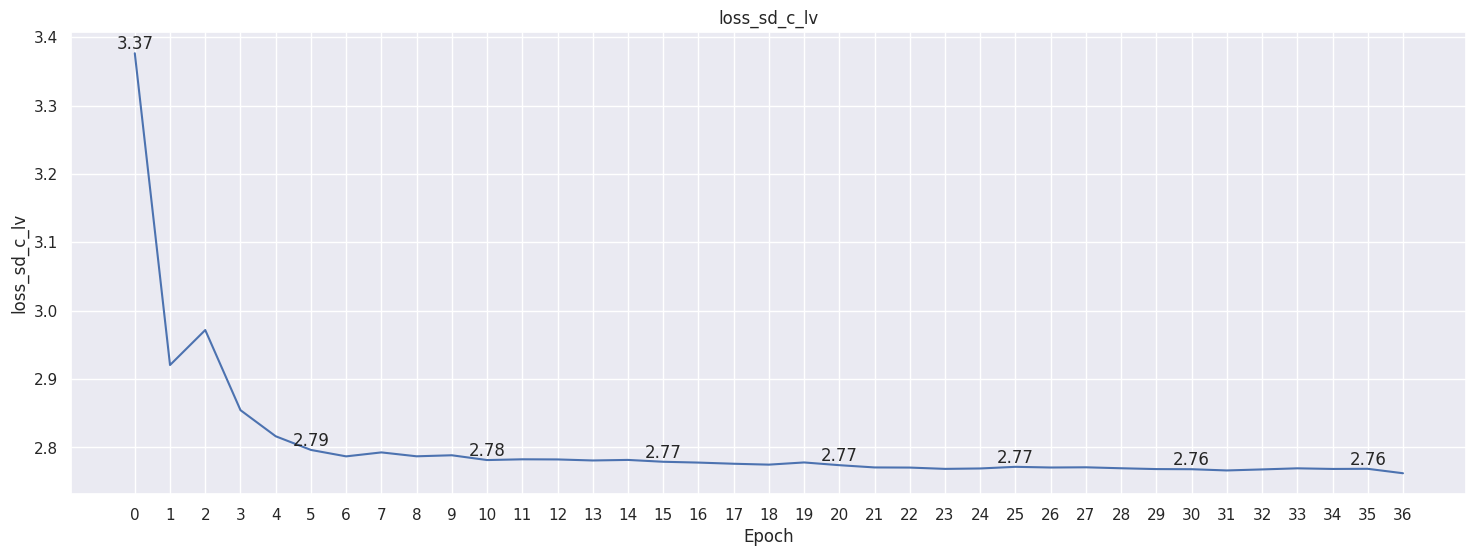

In [34]:
import matplotlib.pyplot as plt

# # 一个示例的Python列表作为输入
# data = [1, 3, 5, 7, 9, 5, 3]

# 创建折线图，设置figsize调整图像大小
plt.figure(figsize=(18, 6))  # 调整图像宽度为12，高度为6

# 创建折线图
plt.plot(matches)

# 添加标题和标签
plt.title('loss_sd_c_lv')
plt.xlabel('Epoch')
plt.ylabel('loss_sd_c_lv')

# 设置横坐标刻度位置和标签
x_values = range(len(matches))
plt.xticks(x_values, [str(i) for i in x_values])

# 在每个数据点上标出具体数值
for i, value in enumerate(matches):
    if i%5 == 0:
        plt.text(i, value, str(value)[:-2], ha='center', va='bottom')

# 显示图表
plt.show()

# 导入配置文件

In [35]:
args = get_config_regression('dmd', 'mosei', '/home/omnisky/Documents/ry/projects/config/config_regression.json')

In [36]:
args

{'model_name': 'dmd',
 'dataset_name': 'mosei',
 'featurePath': './dataset/MOSEI/Processed/aligned_50.pkl',
 'seq_lens': [50, 50, 50],
 'feature_dims': [768, 74, 35],
 'train_samples': 16326,
 'num_classes': 3,
 'language': 'en',
 'KeyEval': 'Loss',
 'need_data_aligned': True,
 'need_model_aligned': True,
 'early_stop': 10,
 'use_bert': True,
 'use_finetune': True,
 'attn_mask': True,
 'update_epochs': 10,
 'att_func_type': 'sparsemax',
 'pool_type': 'max',
 'sd_num': 512,
 'sd_temperature': 2,
 'loss_factor': 0.2,
 'attn_dropout_a': 0.0,
 'attn_dropout_v': 0.0,
 'relu_dropout': 0.0,
 'embed_dropout': 0.0,
 'res_dropout': 0.0,
 'dst_feature_dim_nheads': [50, 10],
 'batch_size': 16,
 'learning_rate': 0.0001,
 'nlevels': 4,
 'conv1d_kernel_size_l': 5,
 'conv1d_kernel_size_a': 1,
 'conv1d_kernel_size_v': 3,
 'text_dropout': 0.3,
 'attn_dropout': 0.4,
 'output_dropout': 0.5,
 'grad_clip': 0.6,
 'patience': 5,
 'weight_decay': 0.001,
 'transformers': 'bert',
 'pretrained': 'bert-base-uncase

In [37]:
with open(args.featurePath, 'rb') as f:
    data = pickle.load(f)

In [38]:
data.keys()

dict_keys(['train', 'valid', 'test'])

In [39]:
# 使用pandas读取csv文件
top5_l_index = pd.read_csv('/workspace/projects/DMD-main/top5_s_l_sd_lv_index.csv')
top5_l_value = pd.read_csv('/workspace/projects/DMD-main/top5_s_l_sd_lv.csv')
top5_v_index = pd.read_csv('/workspace/projects/DMD-main/top5_s_v_sd_lv_index.csv')
top5_v_value = pd.read_csv('/workspace/projects/DMD-main/top5_s_v_sd_lv.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/projects/DMD-main/top5_s_l_sd_lv_index.csv'

In [ ]:
data['test'].keys()

dict_keys(['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'audio_lengths', 'vision_lengths', 'annotations', 'classification_labels', 'regression_labels'])

4659

## 创建包含数据集索引的csv文件

In [ ]:
# import csv
# # 列标题
# header = ["ID", "Raw Text", "Annotation", "Regression Label"]
# # 选择data['test']中情感最强烈的样本

# # 指定 CSV 文件名
# csv_filename = f"/home/omnisky/Documents/ry/projects/result/visualization/a_{args.dataset_name}_testset.csv"

# # 写入 CSV 文件
# with open(csv_filename, mode='w', newline='') as file:
#     writer = csv.writer(file)
    
#     # 写入列标题
#     writer.writerow(header)
    
#     for index in range(len(data['test']['id'])):
#         # 写入行数据
#         writer.writerow([data['test']['id'][index],
#                          data['test']['raw_text'][index].lower(),
#                          data['test']['annotations'][index],
#                          data['test']['regression_labels'][index]])

# print(f"CSV 文件 '{csv_filename}' 已创建成功。")

CSV 文件 '/home/omnisky/Documents/ry/projects/result/visualization/a_mosei_testset.csv' 已创建成功。


In [ ]:
df = pd.read_csv('/home/omnisky/Documents/ry/projects/result/visualization/a_mosei_testset.csv')

In [ ]:
df

,ID,Raw Text,Annotation,Regression Label
0,-6rXp3zJ3kc$_$9,"so the answer to the question, can i contribut...",Positive,0.333333
1,-6rXp3zJ3kc$_$8,many people are not until they get to be a old...,Negative,-1.000000
2,-6rXp3zJ3kc$_$3,and it's a retirement future that can ultimate...,Neutral,0.000000
3,-9y-fZ3swSY$_$1,"it’s so nice, by giving a good example and not...",Positive,1.333333
4,-9y-fZ3swSY$_$0,"is, you can say, hey i really like baby skin, ...",Positive,1.000000
...,...,...,...,...
4654,zhNksSReaQk$_$35,"and yet, it's like, how a/autistic people defe...",Neutral,0.000000
4655,zhNksSReaQk$_$34,but the thing is that intelligence [scoffs] is...,Negative,-2.000000
4656,zhNksSReaQk$_$33,"they're like, ""oh, they have a high iq, they a...",Neutral,0.000000
4657,zvZd3V5D5Ik$_$3,"if you're ready to strengthen your skills, whi...",Positive,1.000000


# 字典可视化

## 热力图

### 函数定义

In [ ]:
def merge_rows_or_columns(data, index_or_columns, merge_rate=2, merge_type='row'):
    if merge_type == 'row':
        merged_data = data.groupby(np.arange(len(data)) // merge_rate, axis=0).mean()
    elif merge_type == 'column':
        merged_data = data.groupby(np.arange(len(data.columns)) // merge_rate, axis=1).mean()
    else:
        raise ValueError("Invalid merge_type. Use 'row' or 'column'.")
    return merged_data

### 例子

In [ ]:
# 创建一个示例DataFrame
data = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
})

plt.figure(figsize=(8, 6))

Merged Rows:
      A    B     C
0  1.5  5.5   9.5
1  3.5  7.5  11.5

Merged Columns:
      0     1
0  3.0   9.0
1  4.0  10.0
2  5.0  11.0
3  6.0  12.0


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

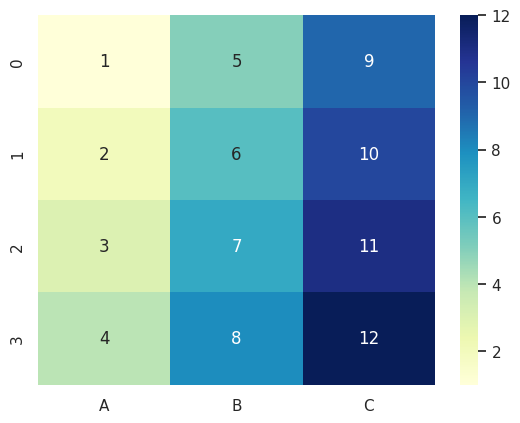

In [ ]:
# 原始数据
sns.heatmap(data, cmap="YlGnBu", annot=True)

Merged Rows:
      A    B     C
0  1.5  5.5   9.5
1  3.5  7.5  11.5


<Axes: >

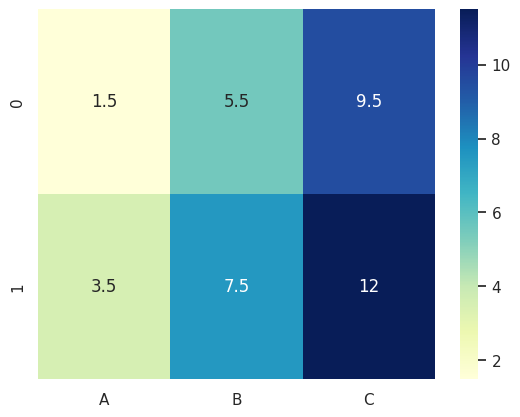

In [ ]:
# 合并行

# 按行合并两行的数据
merged_rows = merge_rows_or_columns(data, index_or_columns=data.index, merge_type='row')
print("Merged Rows:\n", merged_rows)

sns.heatmap(merged_rows, cmap="YlGnBu", annot=True)


Merged Columns:
      0     1
0  3.0   9.0
1  4.0  10.0
2  5.0  11.0
3  6.0  12.0


<Axes: >

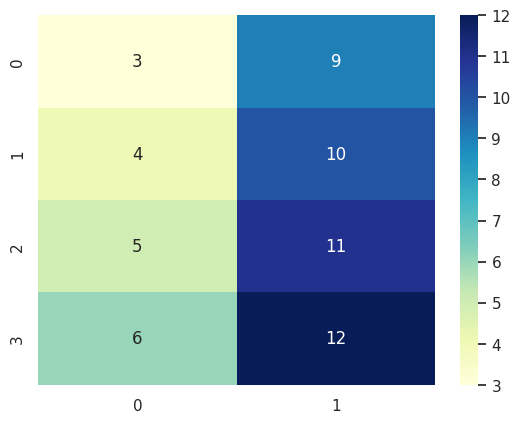

In [ ]:
# 按列合并两列的数据
merged_columns = merge_rows_or_columns(data, index_or_columns=data.columns, merge_type='column')
print("\nMerged Columns:\n", merged_columns)

sns.heatmap(merged_columns, cmap="YlGnBu", annot=True)

## 读取包含字典的csv文件

In [ ]:
# 字典
c_dict = pd.read_csv('/home/omnisky/Documents/ry/projects/result/dict/c_dict.csv')
s_dict = pd.read_csv('/home/omnisky/Documents/ry/projects/result/dict/s_dict.csv')

<Axes: >

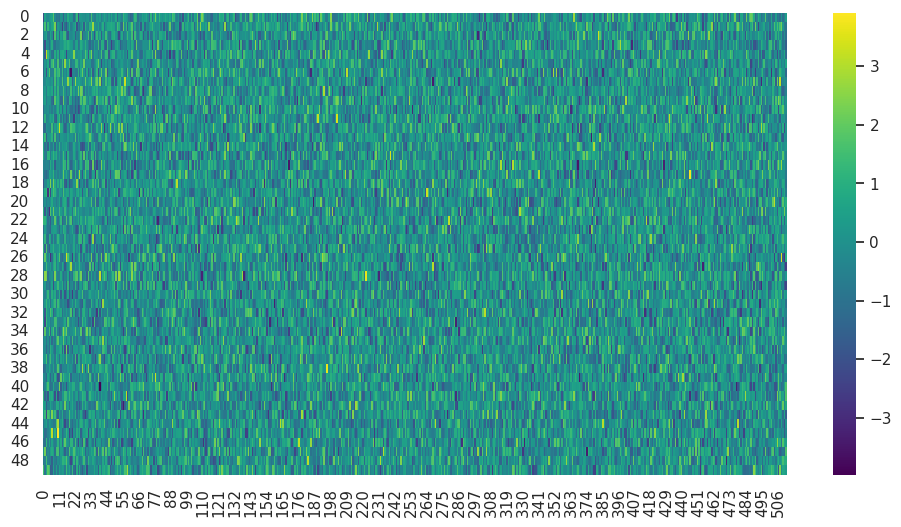

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(c_dict.transpose(), cmap="viridis")

<Axes: >

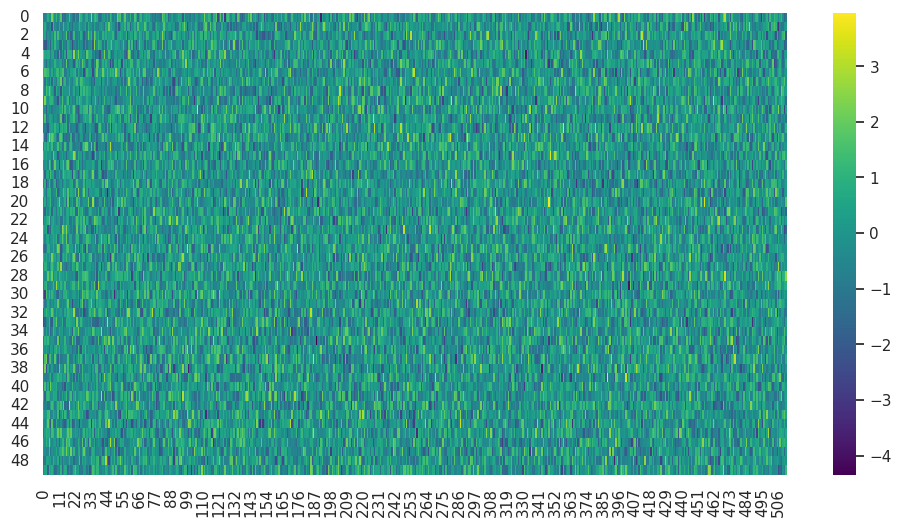

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(s_dict.transpose()[:50], cmap="viridis")

## 可视化 attention weight

### 包含强烈情感的样本选择

In [ ]:
test_dataset = pd.read_csv('/home/omnisky/Documents/ry/projects/result/visualization/a_mosei_testset.csv')

In [ ]:
# 积极情感的样本
test_dataset[test_dataset['Regression Label'] > 2.5] 

,ID,Raw Text,Annotation,Regression Label
101,10219$_$11,and (uhh) it's just a great story so you have ...,Positive,2.666667
108,10219$_$2,it's very good,Positive,2.666667
224,112425$_$9,i think i think (stutter) it's incredible,Positive,2.666667
225,112425$_$8,(umm) it's a story about a rat who decides to ...,Positive,2.666667
326,167521$_$13,it's one of the best action blockbuster i've s...,Positive,2.666667
329,167521$_$14,"bruce willis does his role perfectly, everythi...",Positive,2.666667
417,1jogeKX0wGw$_$2,our nationwide registry includes thousands of ...,Positive,2.666667
1232,2BuFtglEcaY$_$2,"but you know, i was wondering was i was i like...",Positive,2.666667
1424,53766$_$6,but one of the special things for this whole b...,Positive,3.000000
1426,53766$_$8,"it's a great (uhh) box set, amazingly good sou...",Positive,3.000000


In [ ]:
# 消极情感的样本
test_dataset[test_dataset['Regression Label'] < -2.5]

,ID,Raw Text,Annotation,Regression Label
181,108146$_$4,i don't like it,Negative,-2.666667
206,111881$_$2,i was very disappointed in it,Negative,-2.666667
273,126872$_$5,it was kind of (umm) more funny to me than it ...,Negative,-2.666667
306,135623$_$6,"(umm) the acting also horrible, you know, i re...",Negative,-2.666667
349,180971$_$5,"this is not one of my favorite movies, it does...",Negative,-2.666667
...,...,...,...,...
1660,88791$_$10,(umm) basically it was just terrible,Negative,-3.000000
1742,92496$_$0,"hey, (uhh) this is a review of are we done yet...",Negative,-2.666667
1745,92496$_$5,it was it was terrible,Negative,-3.000000
1757,93iGT5oueTA$_$8,mad man made me straight-up angry because it d...,Negative,-2.666667


### 可视化某个样本

In [41]:
id = "130366$_$4"
c_text_att_weight = pd.read_csv(f'/home/omnisky/Documents/ry/projects/result/visualization/{id}/att_weight_c_l.csv')
c_img_att_weight = pd.read_csv(f'/home/omnisky/Documents/ry/projects/result/visualization/{id}/att_weight_c_v.csv')
s_text_att_weight = pd.read_csv(f'/home/omnisky/Documents/ry/projects/result/visualization/{id}/att_weight_s_l.csv')
s_img_att_weight = pd.read_csv(f'/home/omnisky/Documents/ry/projects/result/visualization/{id}/att_weight_s_v.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/omnisky/Documents/ry/projects/result/visualization/130366$_$4/att_weight_c_l.csv'

<Axes: >

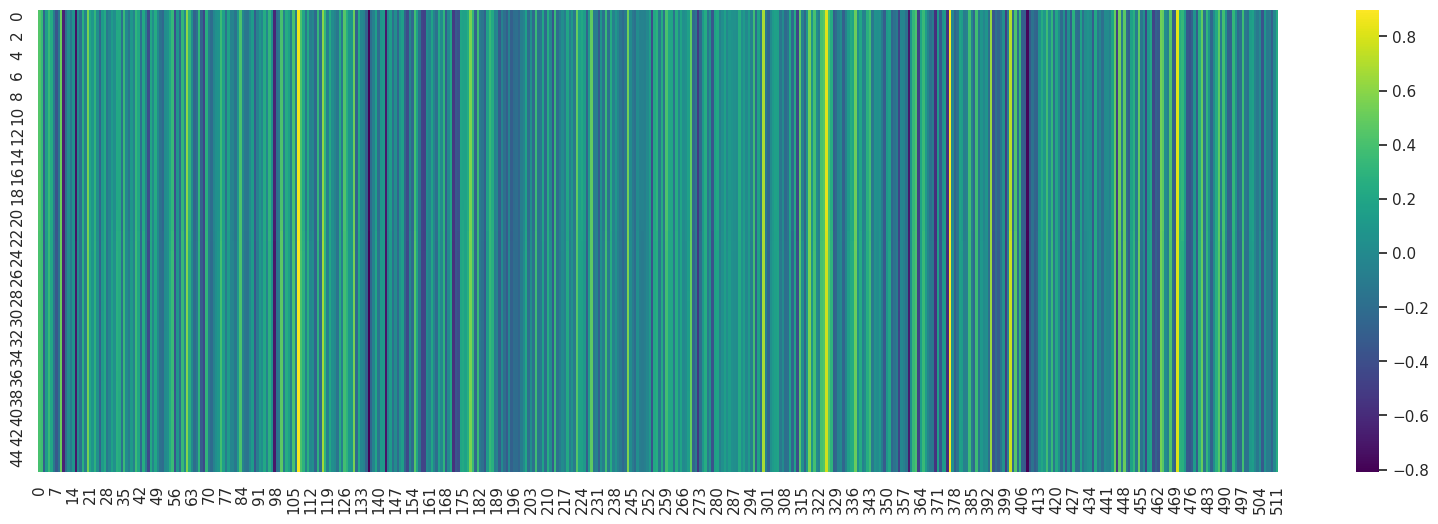

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(c_text_att_weight, cmap="viridis")

<Axes: >

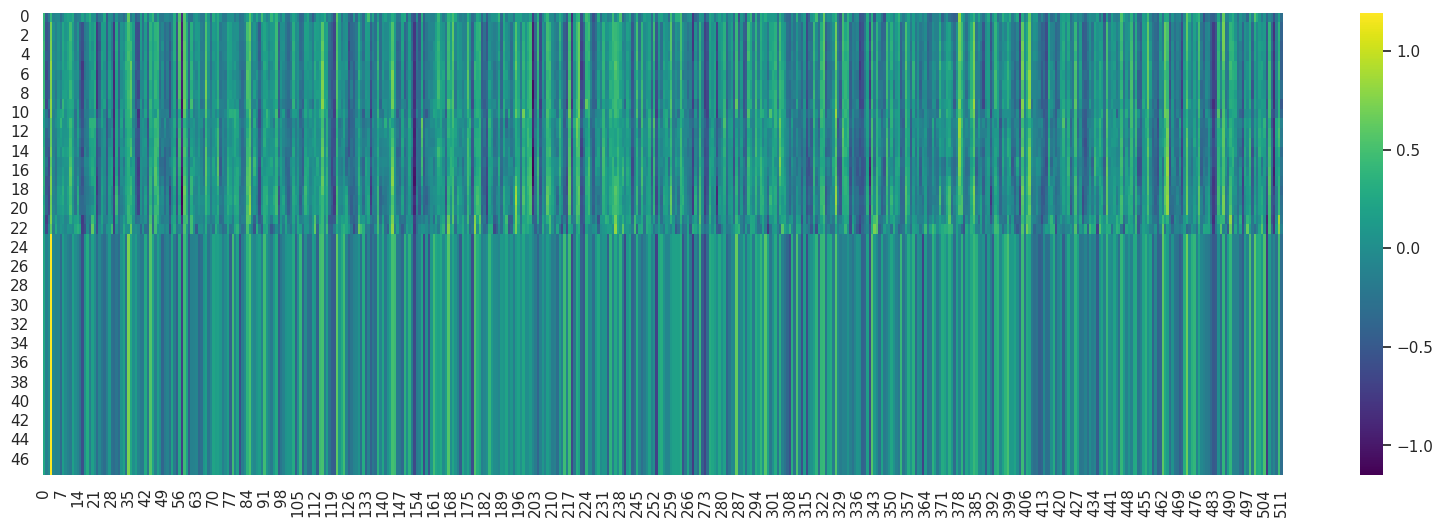

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(c_img_att_weight, cmap="viridis")

<Axes: >

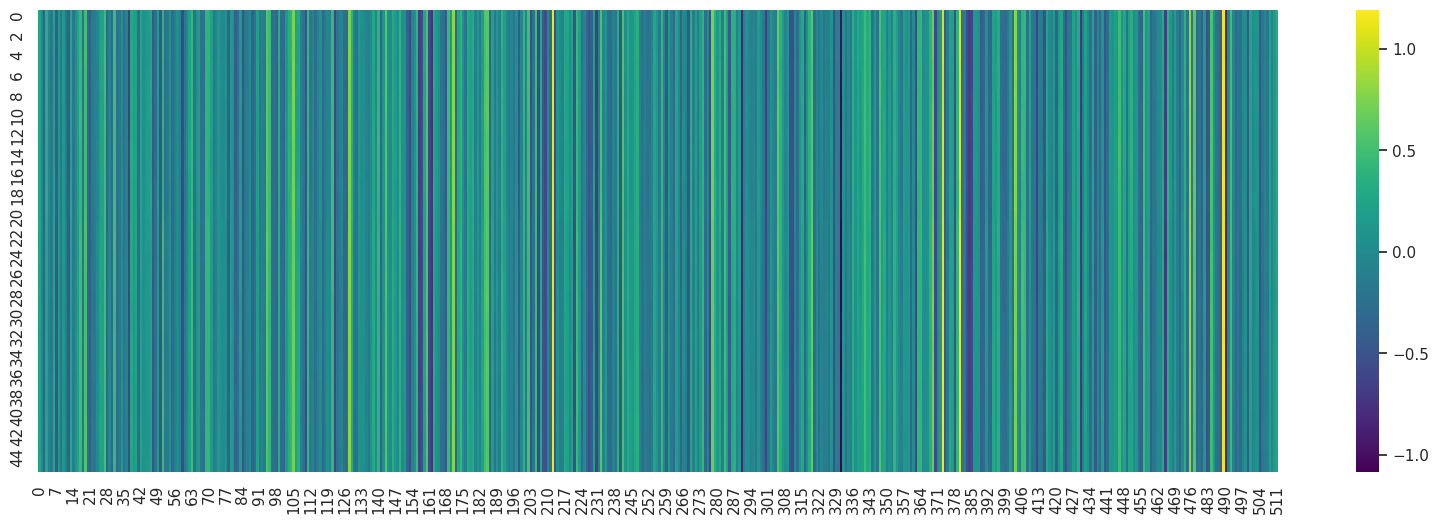

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(s_text_att_weight, cmap="viridis")

<Axes: >

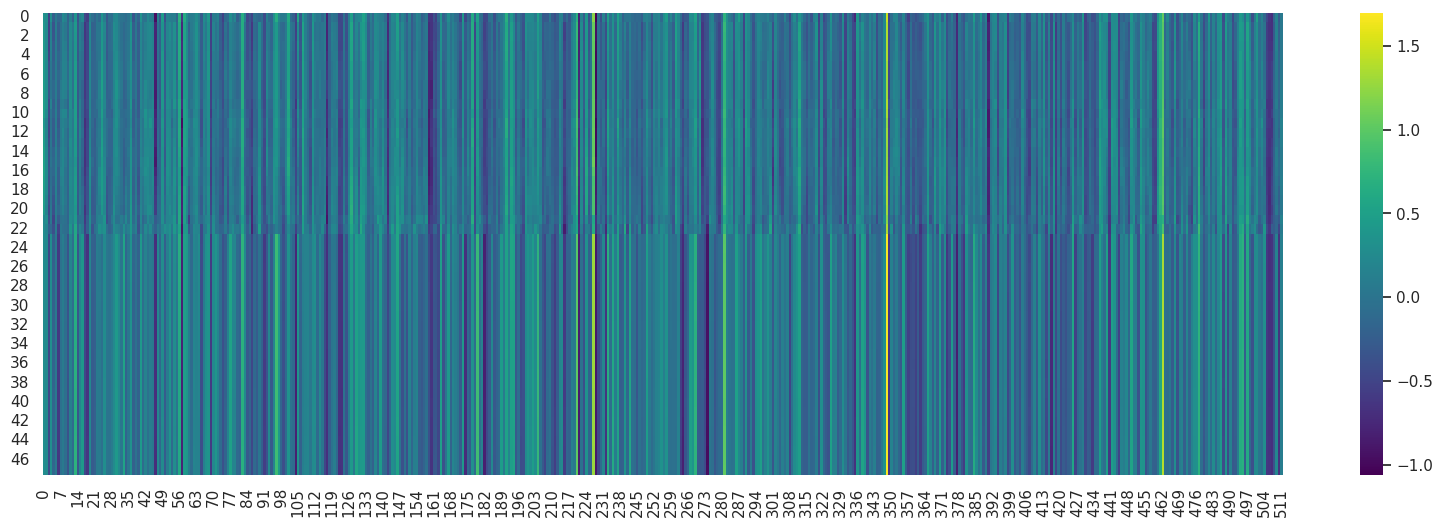

In [ ]:
plt.figure(figsize=(20, 6))
sns.heatmap(s_img_att_weight, cmap="viridis")